In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
import math
%matplotlib inline

<Figure size 2000x2000 with 0 Axes>

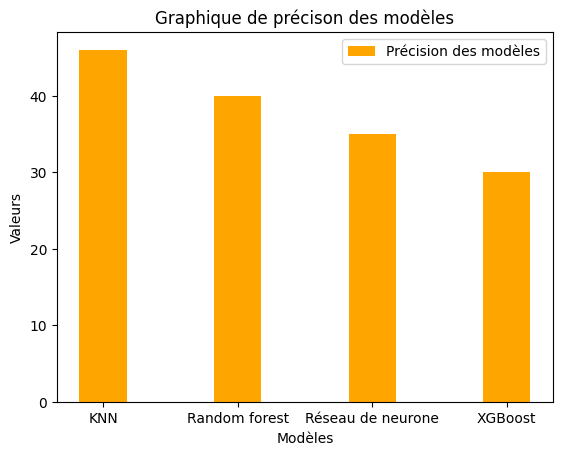

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Modèles en abscisse
models = ['KNN', 'Random forest', 'Réseau de neurone', 'XGBoost']

# Valeurs manuelles pour chaque segment (par exemple, pour deux segments)
segment_1 = [46, 40, 35, 30]

# Positions des barres sur l'axe x
x = np.arange(len(models))

# Largeur des barres
width = 0.35

# Définir la taille de la figure ici
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()

ax.bar(x, segment_1, width, label='Précision des modèles', color='orange')

# Ajouter des étiquettes et un titre
ax.set_xlabel('Modèles')
ax.set_ylabel('Valeurs')
ax.set_title('Graphique de précison des modèles')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Affichage du graphique
plt.show()

In [3]:
# On charge les données
df_train = pd.read_csv('X_train_J01Z4CN.csv')
y_train = pd.read_csv('y_train_OXxrJt1.csv')

df_train



,id_annonce,property_type,approximate_latitude,approximate_longitude,city,postal_code,size,floor,land_size,energy_performance_value,...,nb_parking_places,nb_boxes,nb_photos,has_a_balcony,nb_terraces,has_a_cellar,has_a_garage,has_air_conditioning,last_floor,upper_floors
0,35996577,appartement,43.643880,7.117183,villeneuve-loubet,6270,63.0,NaN,NaN,NaN,...,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35811033,appartement,45.695757,4.895610,venissieux,69200,90.0,3.0,NaN,223.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35731841,maison,47.966791,-1.220451,moutiers,35130,61.0,NaN,370.0,NaN,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,35886765,maison,47.289292,-1.878805,cordemais,44360,142.0,NaN,764.0,217.0,...,0.0,1.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35781137,appartement,45.718992,4.844234,lyon-7eme,69007,88.0,3.0,NaN,NaN,...,0.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,35881571,appartement,43.480292,-1.484324,bayonne,64100,2995.0,NaN,NaN,255.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37364,35890109,appartement,48.861391,2.401158,paris-20eme,75020,36.0,4.0,NaN,229.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37365,36010245,appartement,44.397837,-1.164312,biscarrosse,40600,99.0,2.0,NaN,NaN,...,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37366,35864579,duplex,48.864204,2.808693,magny-le-hongre,77700,9281.0,NaN,NaN,NaN,...,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


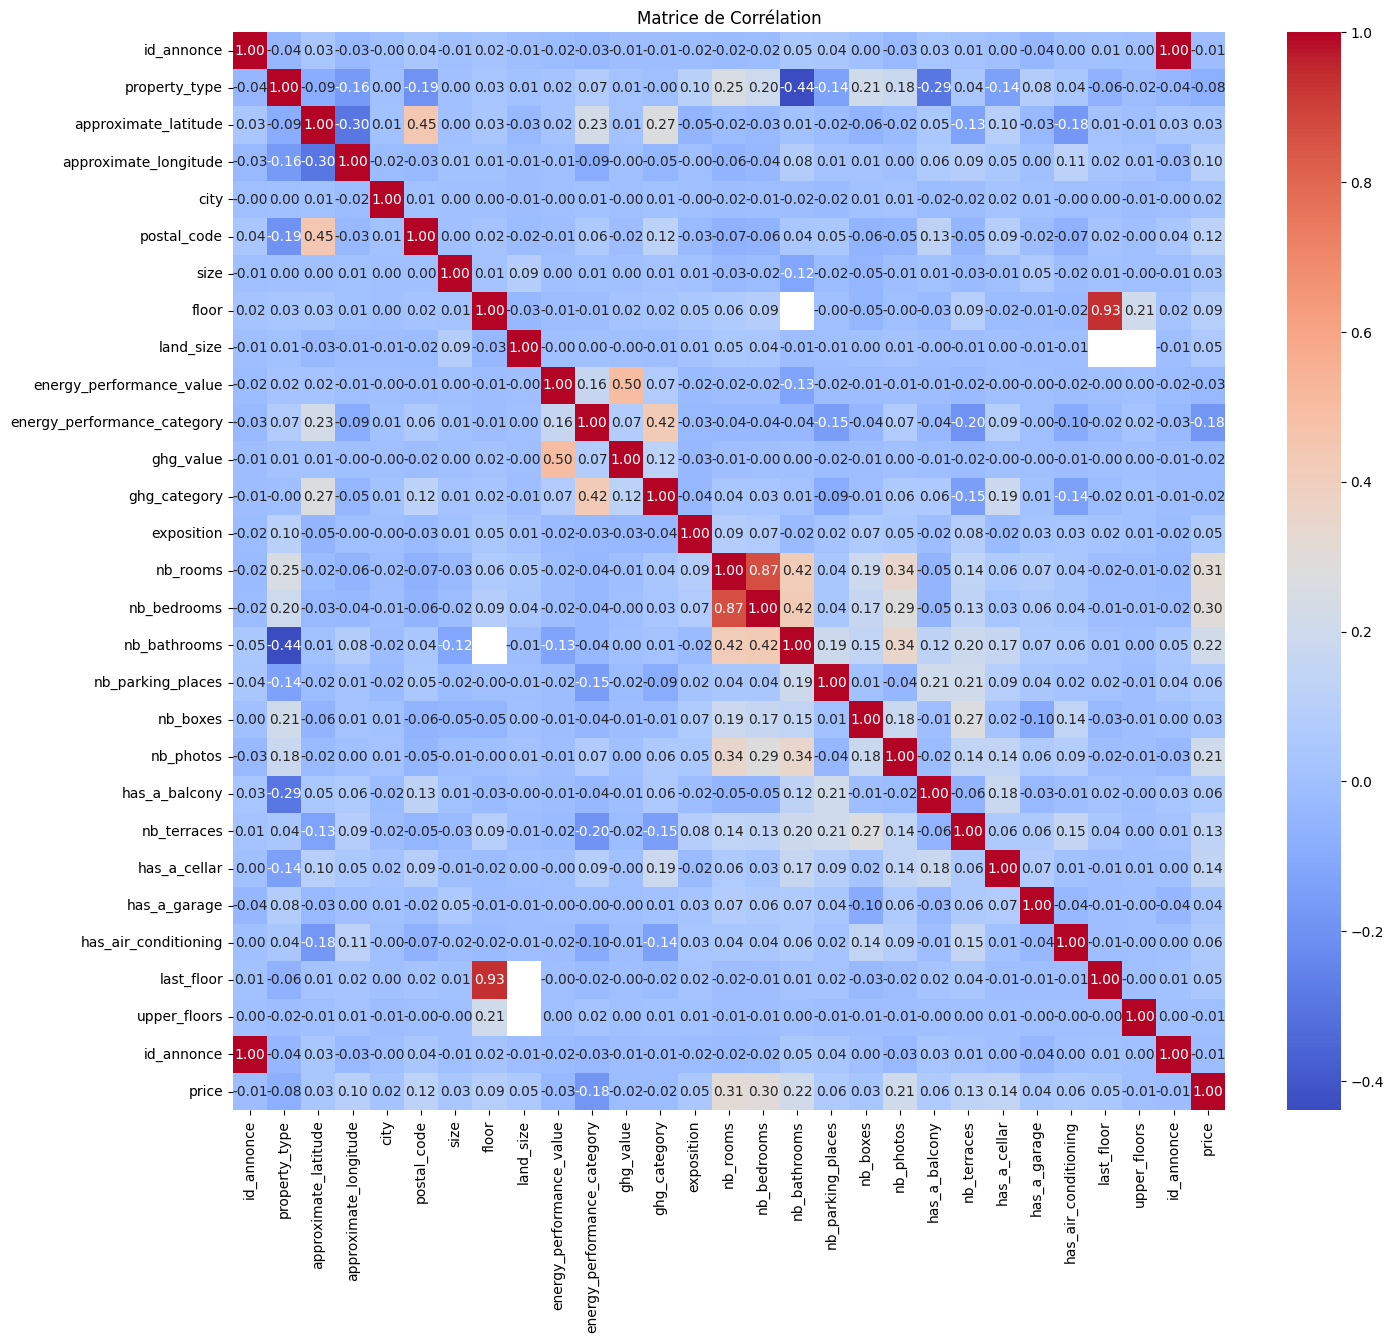

In [4]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Concaténer les colonnes 'property_type' de df_train et df_Xtest pour s'assurer que toutes les catégories sont incluses
df_entrainement = pd.concat([df_train, y_train], axis=1)

# Sélectionner toutes les colonnes de type object (string)
colonnes_str = df_entrainement.select_dtypes(include=['object']).columns

# Créer et ajuster l'encodeur
encoder2 = OrdinalEncoder()
df_entrainement[colonnes_str] = encoder2.fit_transform(df_entrainement[colonnes_str])

# Calculer la matrice de corrélation
matrice_correlation = df_entrainement.corr()

# Création d'un heatmap pour la matrice de corrélation
plt.figure(figsize=(16, 14))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

In [5]:
print(df_train.isna().sum()/len(df_train))
#fill par 0 le floor


id_annonce                     0.000000
property_type                  0.000000
approximate_latitude           0.000000
approximate_longitude          0.000000
city                           0.000000
postal_code                    0.000000
size                           0.013702
floor                          0.739269
land_size                      0.583039
energy_performance_value       0.489724
energy_performance_category    0.489724
ghg_value                      0.504121
ghg_category                   0.504121
exposition                     0.756637
nb_rooms                       0.041908
nb_bedrooms                    0.073137
nb_bathrooms                   0.355197
nb_parking_places              0.000000
nb_boxes                       0.000000
nb_photos                      0.000000
has_a_balcony                  0.000000
nb_terraces                    0.000000
has_a_cellar                   0.000000
has_a_garage                   0.000000
has_air_conditioning           0.000000


In [6]:
def size(df_encoded):
    df_encoded['size'] = df_encoded.groupby('city')['size'].transform(lambda x: x.fillna(x.median()) if not x.median() is np.nan else x)
    df_encoded['size'] = df_encoded.groupby('property_type')['size'].transform(lambda x: x.fillna(x.median()) if not x.median() is np.nan and x.median() != 0 else x)
    return df_encoded

def nbrooms(df_encoded):
    df_encoded['nb_rooms'] = df_encoded.groupby('city')['nb_rooms'].transform(lambda x: x.fillna(x.median()) if not x.median() is np.nan else x)
    df_encoded['nb_rooms'] = df_encoded.groupby('property_type')['nb_rooms'].transform(lambda x: x.fillna(x.median()) if not x.median() is np.nan and x.median() != 0 else x)
    return df_encoded

def energietotal(df_encoded):
    df_encoded['energy_total'] = df_encoded['energy_performance_value']*df_encoded['size']
    return df_encoded

In [7]:
#faire un concat
#faire matrice de correlation 

In [8]:
df_Xtest = pd.read_csv('X_test_BEhvxAN.csv')
df_tout = pd.concat([df_Xtest, df_train], axis=1)
from sklearn.preprocessing import OrdinalEncoder
# Concaténer les colonnes 'property_type' de df_train et df_Xtest pour s'assurer que toutes les catégories sont incluses
all_property_types = pd.concat([df_train['property_type'], df_Xtest['property_type']])
all_property_types2 = pd.concat([df_train['city'], df_Xtest['city']])
all_property_types3 = pd.concat([df_train['energy_performance_category'], df_Xtest['energy_performance_category']])
# Créer et ajuster l'encodeur
encoder = OrdinalEncoder()
encoder.fit(all_property_types.to_frame())  # Convertir en DataFrame car fit attend des données 2D
encoder2=OrdinalEncoder()
encoder2.fit(all_property_types2.to_frame())
encoder3=OrdinalEncoder()
encoder3.fit(all_property_types3.to_frame())



OrdinalEncoder()

In [9]:

df_encoded = df_train.copy()
# Supposons que df est votre DataFrame et 'column_to_encode' est la colonne à encoder
"""df_encoded['city'] = encoder.fit_transform(df_encoded[['city']])""" # Notez les doubles crochets pour garder la dimension 2D
"""df_encoded = target_encode(df_encoded, 'city', 'postal_code')"""
"""df_encoded = pd.get_dummies(df_encoded, columns=['energy_performance_category'])"""
df_encoded = size(df_encoded)
"""df_encoded = nbrooms(df_encoded)"""
property_type = ['property_type']
exposition = ['exposition']
ghg_category = ['ghg_category']
"""cols_to_encode = property_type #+ exposition + ghg_category a voir exposition
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_encode)"""
df_encoded['property_type'] = encoder.transform(df_encoded[['property_type']])
"""df_encoded = energietotal(df_encoded)"""
"""df_encoded['city'] = encoder2.transform(df_encoded[['city']])"""
df_encoded['energy_performance_category'] = encoder3.transform(df_encoded[['energy_performance_category']])
df_encoded.drop(columns=['city'], inplace=True)
df_encoded.drop(columns=['exposition'], inplace=True)
"""df_encoded["floor"]=df_encoded["floor"].fillna(0)"""
df_encoded.drop(columns=['floor'], inplace=True)
df_encoded.drop(columns=['ghg_category'], inplace=True)
df_encoded.drop(columns=['ghg_value'], inplace=True)
"""df_encoded.drop(columns=['energy_performance_category'], inplace=True)"""
Id=df_encoded['id_annonce']
df_encoded.drop(columns=['id_annonce'], inplace=True) # voir pour le gerer
df_encoded.drop(columns=['nb_boxes'], inplace=True)
df_encoded.drop(columns=['upper_floors'], inplace=True)
"""df_encoded.drop(columns=['last_floor'], inplace=True)"""
"""df_encoded.drop(columns=['land_size'], inplace=True)"""
df_encoded.drop(columns=['energy_performance_value'], inplace=True)
df_encoded['nb_bedrooms']=df_encoded['nb_bedrooms'].round()
df_encoded['nb_rooms']=df_encoded['nb_rooms'].round()
df_encoded['nb_bathrooms']=df_encoded['nb_bathrooms'].round()
df_encoded['nb_parking_places']=df_encoded['nb_parking_places'].round()
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer

print(df_encoded.isna().sum()/len(df_encoded))
# Création de l'objet imputer pour l'imputation itérative
iterative_imputer = IterativeImputer()

# Application de l'imputation itérative
df_encoded_imputed_iterative = iterative_imputer.fit_transform(df_encoded)
# Conversion du résultat en DataFrame
df_encoded = pd.DataFrame(df_encoded_imputed_iterative, columns=df_encoded.columns)
"""iterative_imputer = SimpleImputer(strategy='most_frequent')

# Application de l'imputation itérative
df_encoded_imputed_iterative = iterative_imputer.fit_transform(df_encoded)
# Conversion du résultat en DataFrame
df_encoded = pd.DataFrame(df_encoded_imputed_iterative, columns=df_encoded.columns)
"""


property_type                  0.000000
approximate_latitude           0.000000
approximate_longitude          0.000000
postal_code                    0.000000
size                           0.000000
land_size                      0.583039
energy_performance_category    0.489724
nb_rooms                       0.041908
nb_bedrooms                    0.073137
nb_bathrooms                   0.355197
nb_parking_places              0.000000
nb_photos                      0.000000
has_a_balcony                  0.000000
nb_terraces                    0.000000
has_a_cellar                   0.000000
has_a_garage                   0.000000
has_air_conditioning           0.000000
last_floor                     0.000000
dtype: float64


"iterative_imputer = SimpleImputer(strategy='most_frequent')\n\n# Application de l'imputation itérative\ndf_encoded_imputed_iterative = iterative_imputer.fit_transform(df_encoded)\n# Conversion du résultat en DataFrame\ndf_encoded = pd.DataFrame(df_encoded_imputed_iterative, columns=df_encoded.columns)\n"

In [10]:
df_encoded.shape

(37368, 18)

In [11]:
from sklearn.model_selection import train_test_split


X_vraitrain, X_val, y_vraitrain, y_val = train_test_split(df_encoded, y_train['price'], test_size=0.2, random_state=88)


In [12]:
"""from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators= 300, max_depth= 22 ,random_state=1, n_jobs=-1)
model2.fit(X_vraitrain, y_vraitrain)
y_pred2 = model2.predict(X_val)
mean_absolute_percentage_error(y_val, y_pred2)"""

'from sklearn.metrics import mean_absolute_percentage_error\nfrom sklearn.ensemble import RandomForestRegressor\nmodel2 = RandomForestRegressor(n_estimators= 300, max_depth= 22 ,random_state=1, n_jobs=-1)\nmodel2.fit(X_vraitrain, y_vraitrain)\ny_pred2 = model2.predict(X_val)\nmean_absolute_percentage_error(y_val, y_pred2)'

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.08, subsample=0.8, colsample_bytree=0.8, random_state=5, n_jobs=-1)
model.fit(X_vraitrain, y_vraitrain)
y_pred3 = model.predict(X_val)
mean_absolute_percentage_error(y_val, y_pred3) # c ca le meilleur je crois

0.32751044136999946

In [14]:
"""from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Définir les paramètres pour la recherche aléatoire
param_dist = {
    'n_estimators': [1000],
    'max_depth': [9, 10, 11],
    'learning_rate': [0.08],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Créer le modèle XGBRegressor
xgb_model = XGBRegressor(random_state=5, n_jobs=-1)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_absolute_percentage_error', cv=3, random_state=5)

# Ajuster la recherche aléatoire aux données
random_search.fit(X_vraitrain, y_vraitrain)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)

# Prédiction avec le meilleur modèle trouvé
y_pred_best = random_search.best_estimator_.predict(X_val)

# Calculer et afficher le MAPE
mape = mean_absolute_percentage_error(y_val, y_pred_best)
print(f"Mean Absolute Percentage Error: {mape}%")"""

'from sklearn.model_selection import RandomizedSearchCV\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_absolute_percentage_error\n\n# Définir les paramètres pour la recherche aléatoire\nparam_dist = {\n    \'n_estimators\': [1000],\n    \'max_depth\': [9, 10, 11],\n    \'learning_rate\': [0.08],\n    \'subsample\': [0.6, 0.8],\n    \'colsample_bytree\': [0.6, 0.8]\n}\n\n# Créer le modèle XGBRegressor\nxgb_model = XGBRegressor(random_state=5, n_jobs=-1)\n\n# Créer l\'objet RandomizedSearchCV\nrandom_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring=\'neg_mean_absolute_percentage_error\', cv=3, random_state=5)\n\n# Ajuster la recherche aléatoire aux données\nrandom_search.fit(X_vraitrain, y_vraitrain)\n\n# Afficher les meilleurs paramètres\nprint("Meilleurs paramètres:", random_search.best_params_)\n\n# Prédiction avec le meilleur modèle trouvé\ny_pred_best = random_search.best_estimator_.predict(X_val)\n\n# Calculer et affiche

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor

# Définir les paramètres à tester
param_distributions = {
    'n_estimators': [800,1000],
    'num_leaves': [50,20],
    'max_depth': [10,5],
    'learning_rate': [0.06,0.08],
    'subsample': [0.8,0.9],
    'colsample_bytree': [0.8],
}


In [18]:
"""from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Définir les paramètres pour la recherche aléatoire
param_dist = {
    'n_estimators': [1000],
    'max_depth': [9,10],
    'learning_rate': [0.08,0.09],
    'subsample': [0.8,0.9],
    'colsample_bytree': [0.8,0.9]
}

# Créer le modèle XGBRegressor
xgb_model = XGBRegressor(random_state=5, n_jobs=-1)

# Créer l'objet RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='neg_mean_absolute_percentage_error', cv=3, random_state=5)

# Ajuster la recherche aléatoire aux données
random_search.fit(X_vraitrain, y_vraitrain)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", random_search.best_params_)

# Prédiction avec le meilleur modèle trouvé
y_pred_best = random_search.best_estimator_.predict(X_val)

# Calculer et afficher le MAPE
mape = mean_absolute_percentage_error(y_val, y_pred_best)
print(f"Mean Absolute Percentage Error: {mape}%")"""

'from sklearn.model_selection import RandomizedSearchCV\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_absolute_percentage_error\n\n# Définir les paramètres pour la recherche aléatoire\nparam_dist = {\n    \'n_estimators\': [1000],\n    \'max_depth\': [9,10],\n    \'learning_rate\': [0.08,0.09],\n    \'subsample\': [0.8,0.9],\n    \'colsample_bytree\': [0.8,0.9]\n}\n\n# Créer le modèle XGBRegressor\nxgb_model = XGBRegressor(random_state=5, n_jobs=-1)\n\n# Créer l\'objet RandomizedSearchCV\nrandom_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring=\'neg_mean_absolute_percentage_error\', cv=3, random_state=5)\n\n# Ajuster la recherche aléatoire aux données\nrandom_search.fit(X_vraitrain, y_vraitrain)\n\n# Afficher les meilleurs paramètres\nprint("Meilleurs paramètres:", random_search.best_params_)\n\n# Prédiction avec le meilleur modèle trouvé\ny_pred_best = random_search.best_estimator_.predict(X_val)\n\n# Calculer et afficher 

In [19]:
y_pred=model.predict(X_vraitrain)
mean_absolute_percentage_error(y_vraitrain, y_pred)

0.020316003908430268

In [20]:
print(df_encoded.shape)

(37368, 18)


In [21]:
model.fit(df_encoded,y_train['price'].values)
df_Xtest = pd.read_csv('X_test_BEhvxAN.csv')
y=df_Xtest['id_annonce'].values


In [22]:
df_test_encoded = df_Xtest.copy()
# Supposons que df est votre DataFrame et 'column_to_encode' est la colonne à encoder
# Notez les doubles crochets pour garder la dimension 2D

df_test_encoded = size(df_test_encoded)
"""df_test_encoded = nbrooms(df_test_encoded)"""
property_type = ['property_type']
exposition = ['exposition']
ghg_category = ['ghg_category']
df_test_encoded['property_type'] = encoder.transform(df_test_encoded[['property_type']])
df_test_encoded['energy_performance_category'] = encoder3.transform(df_test_encoded[['energy_performance_category']])
df_test_encoded.drop(columns=['city'], inplace=True)
df_test_encoded.drop(columns=['exposition'], inplace=True)
"""df_test_encoded["floor"]=df_test_encoded["floor"].fillna(0)"""
df_test_encoded.drop(columns=['floor'], inplace=True)
df_test_encoded.drop(columns=['ghg_category'], inplace=True)
df_test_encoded.drop(columns=['ghg_value'], inplace=True)
df_test_encoded.drop(columns=['energy_performance_value'], inplace=True)
"""df_test_encoded.drop(columns=['last_floor'], inplace=True)"""
df_test_encoded.drop(columns=['nb_boxes'], inplace=True)
df_test_encoded.drop(columns=['upper_floors'], inplace=True)
Id=df_test_encoded['id_annonce']
df_test_encoded.drop(columns=['id_annonce'], inplace=True) # voir pour le gerer
df_test_encoded['nb_bedrooms']=df_test_encoded['nb_bedrooms'].round()
df_test_encoded['nb_rooms']=df_test_encoded['nb_rooms'].round()
df_test_encoded['nb_bathrooms']=df_test_encoded['nb_bathrooms'].round()
df_test_encoded['nb_parking_places']=df_test_encoded['nb_parking_places'].round()

# Assurez-vous que df_test_encoded a toutes les colonnes de df_encoded
missing_cols = set(df_encoded.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0  # Vous pouvez choisir une autre valeur par défaut si nécessaire

# Réorganiser les colonnes pour correspondre à df_train_encoded
df_test_encoded = df_test_encoded[df_encoded.columns]

# Application de l'imputation itérative
df_test_encoded_imputed_iterative = iterative_imputer.transform(df_test_encoded)

# Conversion du résultat en DataFrame
df_test_encoded = pd.DataFrame(df_test_encoded_imputed_iterative, columns=df_test_encoded.columns)

# Afficher le DataFrame imputé
print(df_test_encoded)




      property_type  approximate_latitude  approximate_longitude  postal_code  \
0              12.0             49.371670               3.533991       2220.0   
1              16.0             49.037190              -0.982385      50160.0   
2               0.0             47.097180               6.149253      25290.0   
3               0.0             43.699670               7.245556       6000.0   
4               5.0             43.849435               6.215461       4360.0   
...             ...                   ...                    ...          ...   
9334           21.0             43.117121               5.790808      83110.0   
9335            0.0             43.099598               5.874048      83500.0   
9336            0.0             45.977895              -1.096506      17450.0   
9337           12.0             47.284067              -2.197979      44600.0   
9338           12.0             46.393504              -1.400820      85750.0   

         size     land_size

In [23]:
df_test_encoded = df_test_encoded.reindex(columns=df_encoded.columns) # On réindexe les colonnes de notre ensemble de validation
df_test_encoded = df_test_encoded.fillna(0) 
columns_test = set(df_test_encoded.columns)
columns_encoded = set(df_encoded.columns)

# Trouver les colonnes qui sont dans df_test mais pas dans df_encoded
diff_test_encoded = columns_test - columns_encoded
print("Colonnes dans df_test mais pas dans df_encoded:", diff_test_encoded)

# Trouver les colonnes qui sont dans df_encoded mais pas dans df_test
diff_encoded_test = columns_encoded - columns_test
print("Colonnes dans df_encoded mais pas dans df_test:", diff_encoded_test)

print(df_Xtest['id_annonce'].values)
print(df_test_encoded.shape)



Colonnes dans df_test mais pas dans df_encoded: set()
Colonnes dans df_encoded mais pas dans df_test: set()
[35160615 35830639 36016657 ... 35793053 36049283 35853753]
(9339, 18)


In [24]:
X = model.predict(df_test_encoded)
print(X.shape)
csv = pd.DataFrame({'id_annonce': Id , 'price': X})
#csv = pd.DataFrame({'id_annonce': X_test['id_annonce'], 'price': X})
csv.to_csv("C:/Users/gabriel/Desktop/Dauphine/Dauphine L2/Semestre 2/MIDO/Intro machine learning réseaux de neurones/ml prix appart/prediction.csv", index = False)


(9339,)
